In [9]:
import geopandas as gpd
import pandas as pd
import shapely
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pylab as pl

In [2]:
filename = "allData/DataByPuma.shp"

In [3]:
data = gpd.GeoDataFrame.from_file(filename)

In [4]:
data.crs

{'init': u'epsg:4326'}

In [5]:
data.head(2)

,puma,GeogName,GeoID,Borough,Population,totalHouse,CollegeStu,Immigrants,Highschool,unemployed,avgHouseIn,num_calls,review_cou,price,rating,PartyCount,geometry
0,3701,"NYC-Bronx Community District 8--Riverdale, Fie...",3701,Bronx,109810,41718,14443,16220,4460,5242,81929,373,1162,1.578947,3.763158,17,POLYGON ((-73.89641133483133 40.90450452082026...
1,3702,"NYC-Bronx Community District 12--Wakefield, Wi...",3702,Bronx,144341,47817,6696,22155,8672,9502,61428,435,163,2.166667,2.638889,1,"POLYGON ((-73.8442314689986 40.86942035096838,..."


In [6]:
data.corr()

,puma,GeoID,Population,totalHouse,CollegeStu,Immigrants,Highschool,unemployed,avgHouseIn,num_calls,review_cou,price,rating,PartyCount
puma,1.000000,1.000000,0.096039,-0.121676,-0.114552,0.176901,0.005764,-0.181792,-0.029715,-0.082832,-0.183000,0.084435,0.003608,0.113420
GeoID,1.000000,1.000000,0.096039,-0.121676,-0.114552,0.176901,0.005764,-0.181792,-0.029715,-0.082832,-0.183000,0.084435,0.003608,0.113420
Population,0.096039,0.096039,1.000000,0.716879,0.272483,0.576480,0.534624,0.510642,0.137825,0.157436,0.072043,0.003948,0.115334,-0.004431
totalHouse,-0.121676,-0.121676,0.716879,1.000000,0.800118,0.215613,-0.100164,0.119089,0.648065,0.458160,0.510770,0.232750,0.185112,0.192195
CollegeStu,-0.114552,-0.114552,0.272483,0.800118,1.000000,-0.139280,-0.531506,-0.282824,0.923985,0.387026,0.496962,0.359141,0.239896,0.206729
Immigrants,0.176901,0.176901,0.576480,0.215613,-0.139280,1.000000,0.360203,0.379598,-0.260310,0.013562,-0.097226,-0.096252,0.001803,0.149429
Highschool,0.005764,0.005764,0.534624,-0.100164,-0.531506,0.360203,1.000000,0.630102,-0.594416,-0.379120,-0.510380,-0.324292,-0.129052,-0.360612
unemployed,-0.181792,-0.181792,0.510642,0.119089,-0.282824,0.379598,0.630102,1.000000,-0.406913,0.056058,-0.128426,-0.162969,-0.082686,-0.001301
avgHouseIn,-0.029715,-0.029715,0.137825,0.648065,0.923985,-0.260310,-0.594416,-0.406913,1.000000,0.361646,0.498809,0.340012,0.230696,0.206340
num_calls,-0.082832,-0.082832,0.157436,0.458160,0.387026,0.013562,-0.379120,0.056058,0.361646,1.000000,0.908949,0.062314,0.154883,0.561587


In [66]:
import seaborn as sns

In [70]:
print([str(d) for d in data.columns])

['puma', 'GeogName', 'GeoID', 'Borough', 'Population', 'totalHouse', 'CollegeStu', 'Immigrants', 'Highschool', 'unemployed', 'avgHouseIn', 'num_calls', 'review_cou', 'price', 'rating', 'PartyCount', 'geometry']


In [71]:
selectcols = ['Population', 'totalHouse', 'CollegeStu', 'Immigrants', 'Highschool', 'unemployed', 'avgHouseIn', 'num_calls', 'review_cou', 'price', 'rating', 'PartyCount']

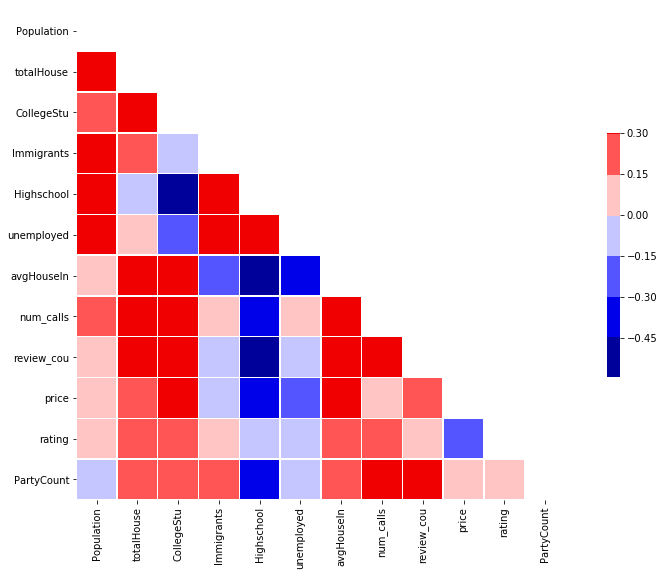

In [73]:
corr = data[selectcols].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 9))

# Generate a custom diverging colormap
cmap = sns.mpl_palette("seismic", 8)

# Draw the heatmap with the mask and correct aspect ratio
_ = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
import pysal as ps

/home/urwa/miniconda3/envs/usa/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


In [11]:
qW_CT = ps.weights.Queen.from_dataframe(data)

In [12]:
# weight matrix
Wmatrix, ids = qW_CT.full()

In [13]:
#Change the matrix to be row-standardized
qW_CT.transform = 'r'


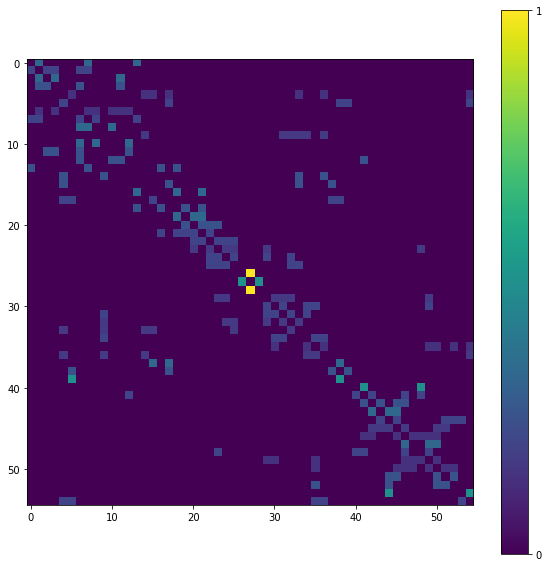

In [21]:
#visualize weights matrix
plt.subplots(figsize=(10, 10))
pl.imshow(qW_CT.full()[0])
pl.colorbar(ticks=[0,1])

In [57]:
calls=data.PartyCount
I_calls = ps.Moran(calls, qW_CT)

In [65]:
ps.Moran?

In [59]:
I_calls.I

0.26640595172883158

In [60]:
I_calls.EI

-0.018518518518518517

In [61]:
I_calls.p_rand

0.0012684641689355569

In [62]:
I_calls.z_rand

3.2230206317568273

In [23]:
p = data.num_calls

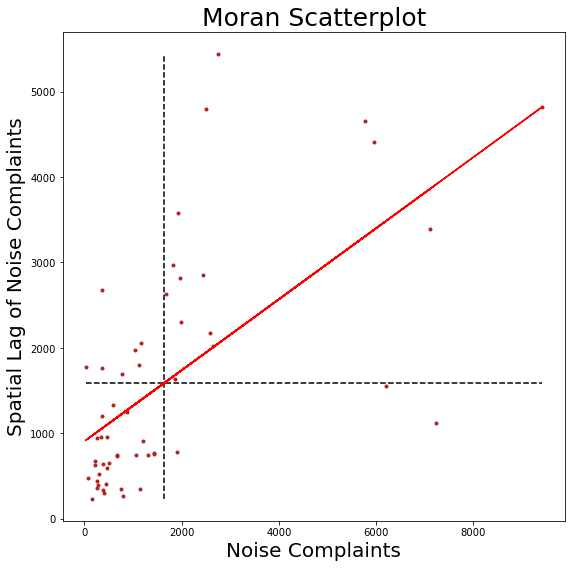

In [24]:
# Morans I plot

# Spatial Lag
pLag=ps.lag_spatial(qW_CT, p)

b,a = np.polyfit(p, pLag, 1)
b,a  # b here is Morans I

#Morans I plot
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(p, pLag, '.', color='firebrick')

# dashed vert at mean of the last year's PCI
plt.vlines(p.mean(), pLag.min(), pLag.max(), linestyle='--')
 # dashed horizontal at mean of lagged PCI
plt.hlines(pLag.mean(), p.min(), p.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(p, a + b*p, 'r')
plt.title('Moran Scatterplot',fontsize = 25)
plt.ylabel('Spatial Lag of Noise Complaints', fontsize = 20)
plt.xlabel('Noise Complaints', fontsize = 20);

In [42]:
b

-0.054839050129394981

## Regression 

In [75]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [77]:
formula = 'PartyCount~'+'+'.join([c for c in selectcols if c not in ['PartyCount'] ])
formula

'PartyCount~Population+totalHouse+CollegeStu+Immigrants+Highschool+unemployed+avgHouseIn+num_calls+review_cou+price+rating'

In [79]:
# multivariate regrssion
mod = smf.ols(formula=formula, data = data).fit()

In [80]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             PartyCount   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     3.716
Date:                Mon, 26 Nov 2018   Prob (F-statistic):           0.000916
Time:                        01:20:36   Log-Likelihood:                -187.97
No. Observations:                  55   AIC:                             399.9
Df Residuals:                      43   BIC:                             424.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3097     21.733      0.244      0.8